In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action ="ignore", category=  FutureWarning)
matches=pd.read_csv(r'C:\Users\DeLL\Downloads\matches.csv')
matches["type"]= "pre-qualifier"
for year in range(2008,2018):
    fmi=matches[matches['season']==year][-1:].index.values[0]
    matches=matches.set_value(fmi, "type", "final")
    matches=matches.set_value(fmi-1, "type", "qualifier-2")
    matches=matches.set_value(fmi-2, "type", "eliminator")
    matches=matches.set_value(fmi-3, "type", "qualifier-1")
    
matches.groupby(["type"]) ["id"].count()
matches.head()
    


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,type
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,pre-qualifier
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,pre-qualifier
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,pre-qualifier
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,pre-qualifier
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,pre-qualifier


In [2]:
deliveries=pd.read_csv(r'C:\Users\DeLL\Desktop\deliveries1.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
team_score=deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_score.columns=['match_id', 'Team1_score', 'Team2_score', 'Team1_superover_score', 'Team2_superover_score']
matches_agg=pd.merge(matches, team_score, left_on='id', right_on='match_id', how='outer')


team_extras=deliveries.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns=['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg=pd.merge(matches_agg, team_extras, on='match_id', how='outer')



cols=['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
     'Team1_score', 'Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score',
    'Team2_superover_score', 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'type', 'venue', 'umpire1',
     'umpire2', 'umpire3']
matches_agg=matches_agg[cols]
matches_agg.head()


,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,type,venue,umpire1,umpire2,umpire3
0,1.0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,NaN,NaN,NaN,Yuvraj Singh,pre-qualifier,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2.0,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,NaN,NaN,NaN,NaN,SPD Smith,pre-qualifier,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3.0,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,NaN,NaN,NaN,NaN,CA Lynn,pre-qualifier,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4.0,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,NaN,NaN,NaN,NaN,GJ Maxwell,pre-qualifier,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5.0,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,NaN,NaN,NaN,NaN,KM Jadhav,pre-qualifier,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#batsman aggregate
batsman_grp=deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen=batsman_grp["batsman_runs"].sum().reset_index()
#ignoring wide balls
balls_faced=deliveries[deliveries["wide_runs"]==0]
balls_faced=balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns=["match_id","inning","batsman", "balls_faced"]
batsmen=batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")
fours=deliveries[ deliveries["batsman_runs"]==4]
sixes=deliveries[ deliveries["batsman_runs"]==6]

fours_per_batsman=fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman=sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index() 

fours_per_batsman.columns=["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns=["match_id", "inning", "batsman", "6s"]

batsmen=batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")

batsmen=batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")

batsmen['SR']=np.round(batsmen['batsman_runs']/ batsmen['balls_faced']*100, 2)
for col in["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col]=batsmen[col].fillna(0)
    
dismissals=deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals=dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed":"batsman"}, inplace=True)
batsmen=batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], right_on=["match_id","inning", "batsman"],
                      how="left")
batsmen=matches[['id','season']].merge(batsmen, left_on='id', right_on='match_id', how='left').drop('id', axis=1)
batsmen.head()
                      

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1.0,1.0,Kolkata Knight Riders,BB McCullum,158.0,73.0,10.0,13.0,216.44,NaN,NaN
1,2017,1.0,1.0,Kolkata Knight Riders,DJ Hussey,12.0,12.0,1.0,0.0,100.00,caught,CL White
2,2017,1.0,1.0,Kolkata Knight Riders,Mohammad Hafeez,5.0,3.0,1.0,0.0,166.67,NaN,NaN
3,2017,1.0,1.0,Kolkata Knight Riders,RT Ponting,20.0,20.0,1.0,1.0,100.00,caught,P Kumar
4,2017,1.0,1.0,Kolkata Knight Riders,SC Ganguly,10.0,12.0,2.0,0.0,83.33,caught,JH Kallis


In [5]:
#bowler aggregates

bowler_grp=deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers=bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"]=bowlers["total_runs"]-(bowlers["bye_runs"]+ bowlers["legbye_runs"])
bowlers["extras"]=bowlers["wide_runs"]+ bowlers["noball_runs"]

del(bowlers["bye_runs"])
del(bowlers["legbye_runs"])
del(bowlers["total_runs"])

dismissal_kinds_for_bowler=["bowled", "caught", "stumped", "lbw", "caught and bowled", "hit wicket"]
dismissals=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals=dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind":"wickets"}, inplace=True)

bowlers=bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], right_on=["match_id",
"inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"]= bowlers["wickets"].fillna(0)

bowlers_over=bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers=bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over',1)
bowlers=bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how='left')
bowlers['Econ']= np.round(bowlers['runs']/ bowlers['over'], 2)
bowlers=matches[['id','season']].merge(bowlers, left_on='id', right_on='match_id', how='left').drop('id', axis=1)

bowlers.head()
                                                        
    
                                                                                                               

                                                                                                              

,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1.0,1.0,Royal Challengers Bangalore,AA Noffke,4.0,5.0,0.0,40.0,5.0,1.0,10.00
1,2017,1.0,1.0,Royal Challengers Bangalore,CL White,1.0,2.0,0.0,24.0,2.0,0.0,24.00
2,2017,1.0,1.0,Royal Challengers Bangalore,JH Kallis,4.0,1.0,0.0,48.0,1.0,1.0,12.00
3,2017,1.0,1.0,Royal Challengers Bangalore,P Kumar,4.0,1.0,0.0,38.0,1.0,0.0,9.50
4,2017,1.0,1.0,Royal Challengers Bangalore,SB Joshi,3.0,0.0,0.0,26.0,0.0,0.0,8.67


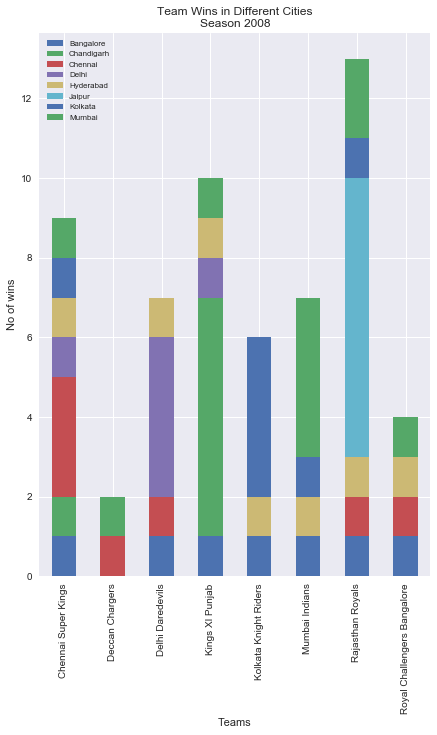

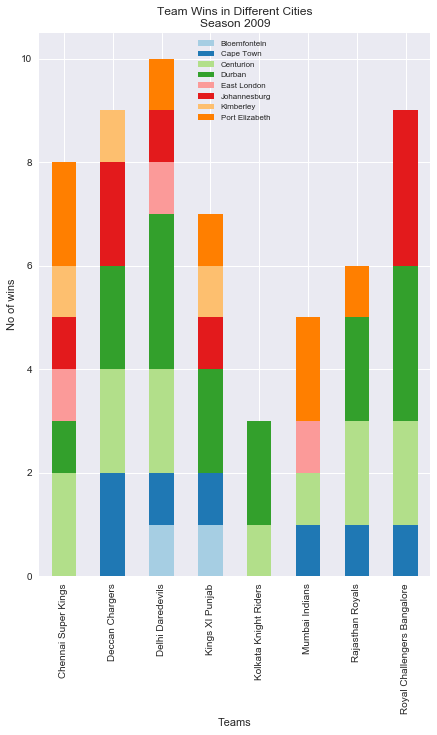

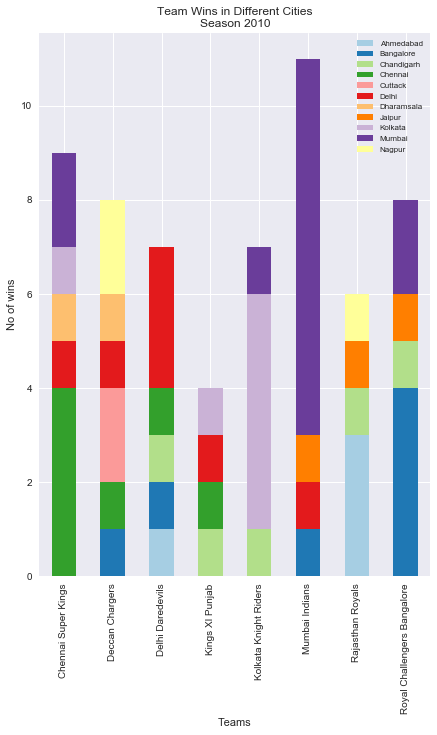

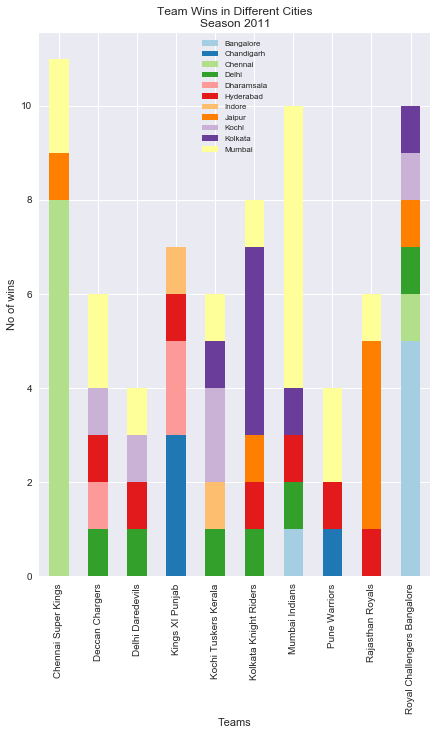

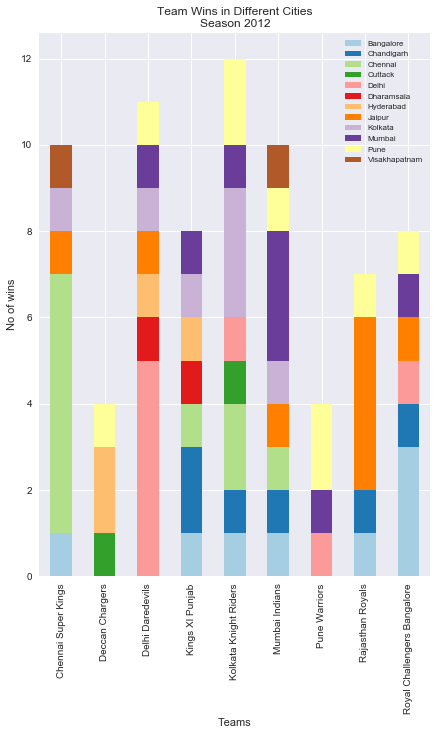

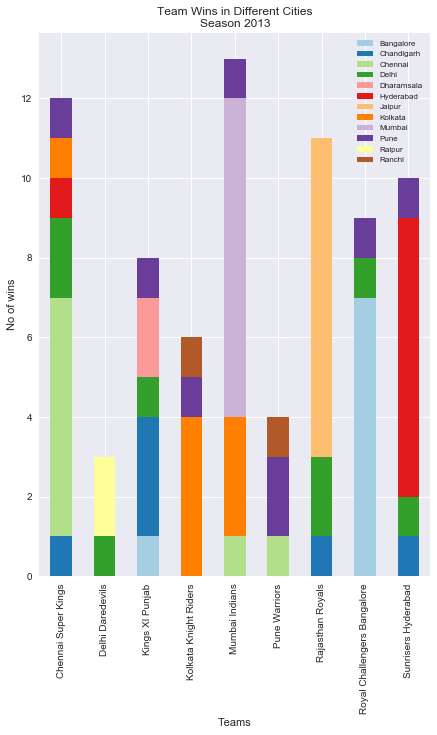

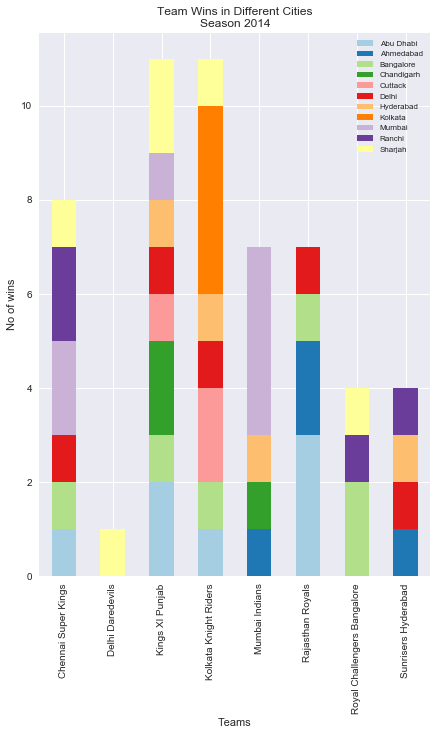

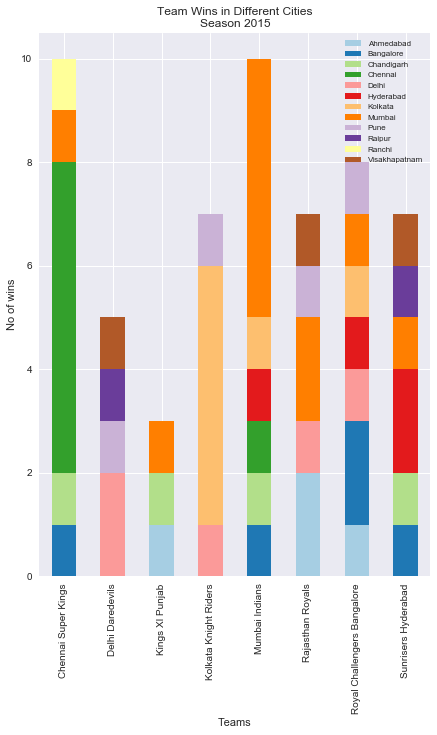

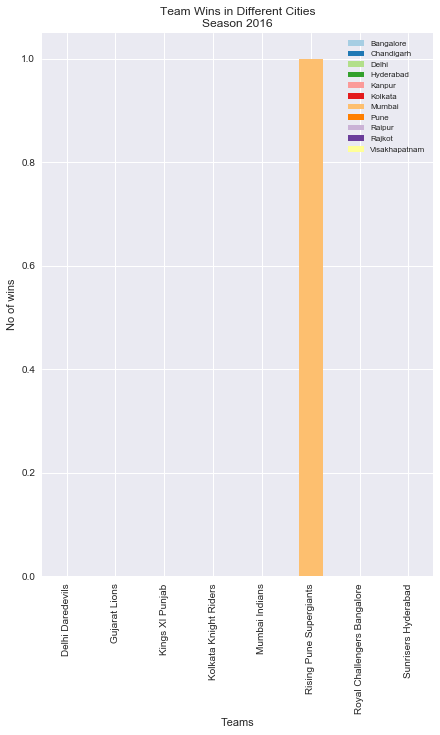

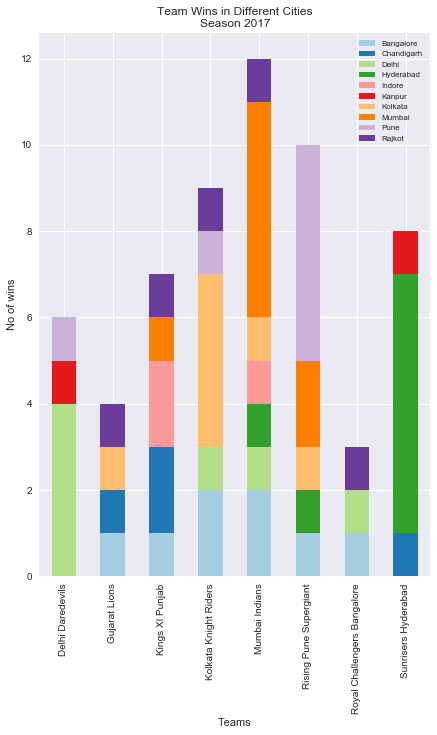

In [6]:
#number of wins by team and season in each city
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
%matplotlib inline
x,y=2008, 2018
while x<y:
    wins_percity=matches_agg[matches_agg['season']== x].groupby(['winner', 'city'])['match_id'].count().unstack()
    plot=wins_percity.plot(kind='bar', stacked=True, title="Team Wins in Different Cities\nSeason "+str(x), figsize=(7,10))
    sns.set_palette("Paired", len(matches_agg['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1
    
    

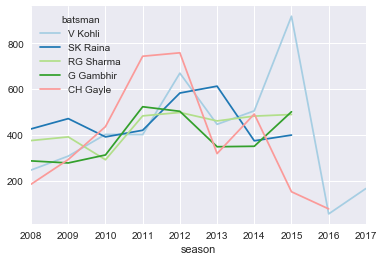

In [7]:
#top 5 batsmen over the seasons
batsman_runsperseason= batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason= batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total']= batsman_runsperseason.sum(axis=1)

batsman_runsperseason= batsman_runsperseason.sort_values(by = 'Total', ascending=False).drop('Total',1)
ax=batsman_runsperseason[:5].T.plot()

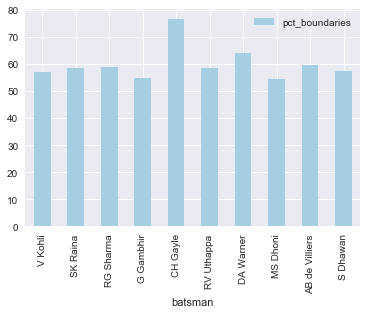

In [8]:
# % of runs scored through boundaries

batsman_runs= batsmen.groupby(['batsman'])['batsman_runs', '4s', '6s'].sum().reset_index()
batsman_runs['4s_6s']= batsman_runs['4s'] * 4 + batsman_runs['6s']*6 
batsman_runs['pct_boundaries']= np.round(batsman_runs['4s_6s'] /  batsman_runs['batsman_runs']*100, 2)
batsman_runs= batsman_runs.sort_values(by ='batsman_runs', ascending=False)
batsman_runs[:10].plot(x='batsman', y='pct_boundaries', kind='bar')



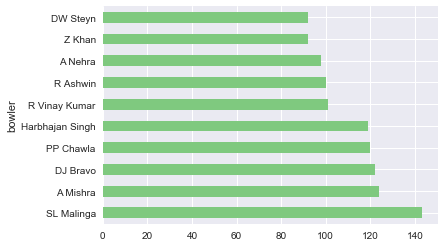

In [9]:
#performance of top bowlers over seasons

bowlers_wickets=bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending=False, inplace=True)
bowlers_wickets[:10].plot(x='bowler', y='runs', kind='barh', colormap='Accent')

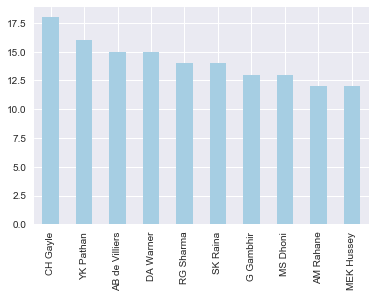

In [10]:
#player of match

matches['player_of_match'].value_counts()[:10].plot(kind ='bar')

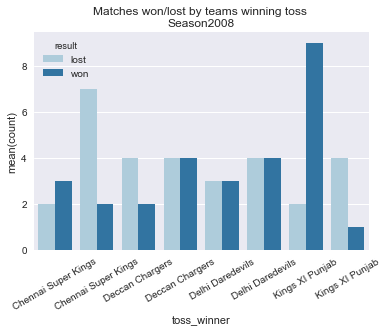

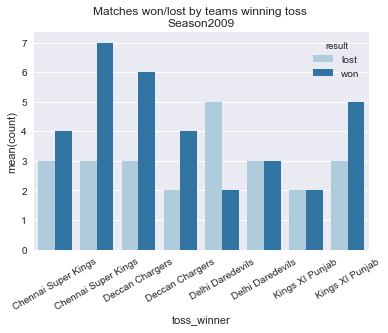

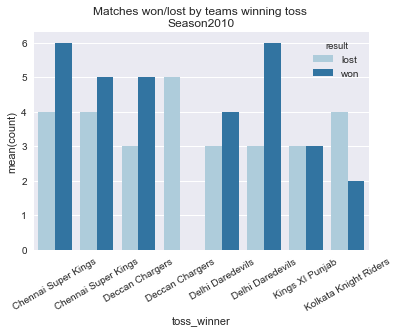

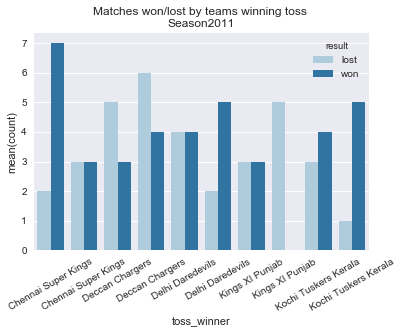

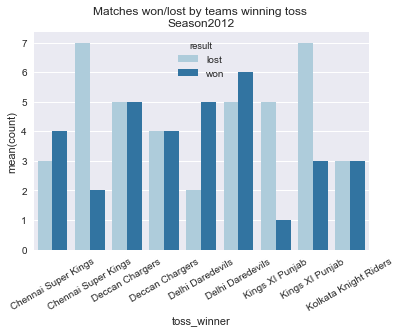

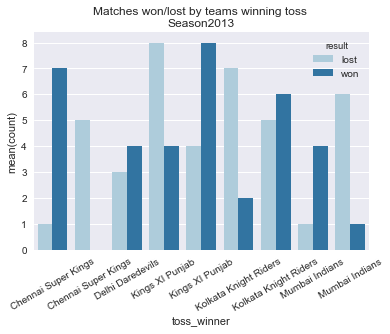

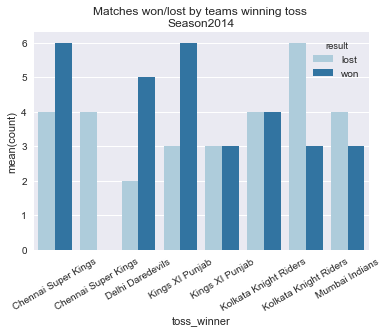

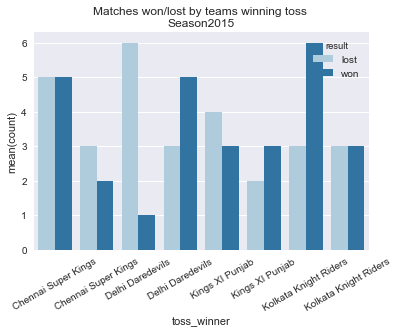

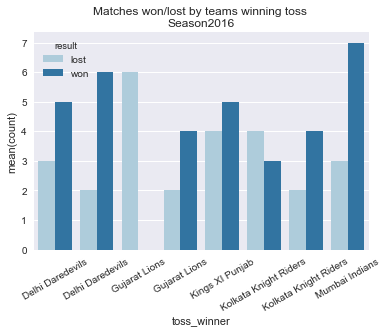

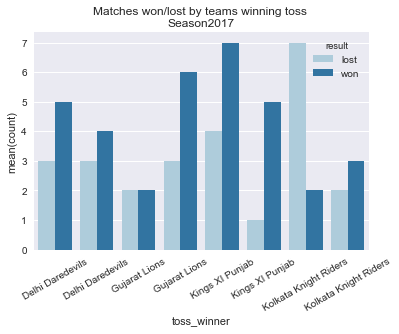

In [11]:
#impact of toss on match outcome

toss=matches_agg.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name= 'count')
toss['result']=np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result=toss.groupby(['season','toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2018, 1):
    toss_result_x= toss_result[toss_result['season']==x]
    plot=sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1

In [12]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 19 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
type               636 non-null object
dtypes: float64(1), int64(5), object(13)
memory usage: 94.5+ KB


In [13]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,type
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN,pre-qualifier
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,pre-qualifier
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN,pre-qualifier


In [14]:
matches['winner'].fillna('Draw', inplace=True)

In [15]:
matches.replace(['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 
                 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Pune Warriors']
                ,['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP',
                 'SRH', 'RPS', 'RPS',  'KTK', 'PW'],inplace=True)
encode={'team1': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12, 'PW':13}
        , 'team2': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12, 'PW':13
                   },  'toss_winner': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12,
                                      'PW':13}, 'winner': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12,
                                                          'PW':13, 'Draw':14}}
matches.replace(encode, inplace=True)
matches.head()
        

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,type
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,pre-qualifier
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,pre-qualifier
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,pre-qualifier
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,pre-qualifier
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,pre-qualifier


In [16]:
#find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,type
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN,pre-qualifier
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN,pre-qualifier
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN,pre-qualifier
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN,pre-qualifier
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN,pre-qualifier
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN,pre-qualifier
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN,pre-qualifier


In [17]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,5.540881,5.511006,5.371069,0.025157,5.309748,13.682390,3.372642,NaN
std,183.741666,2.773026,3.329169,3.341677,3.293140,0.156726,3.288726,23.908877,3.420338,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,9.000000,8.000000,7.250000,0.000000,8.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000,NaN


In [18]:
dicVal=encode['winner']
print(dicVal['MI'])
print(list(dicVal.keys())[list(dicVal.values()).index(1)])

1
MI


In [19]:
matches=matches[['team1', 'team2', 'city', 'toss_decision', 'toss_winner', 'venue', 'winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [20]:
df=pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [21]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

print('No of toss winners by each team')
for idx, val in temp1.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
     print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
    

No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


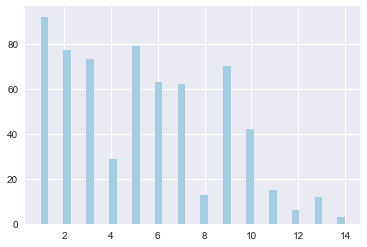

In [22]:
df['winner'].hist(bins=40) #shows MI won most matches followed by CSK 

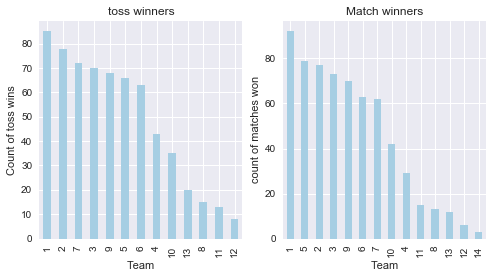

In [23]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,4))
ax1= fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind ='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")
